# SVM을 훈련시키보자

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from mlxtend.plotting import plot_decision_regions
import pandas as pd

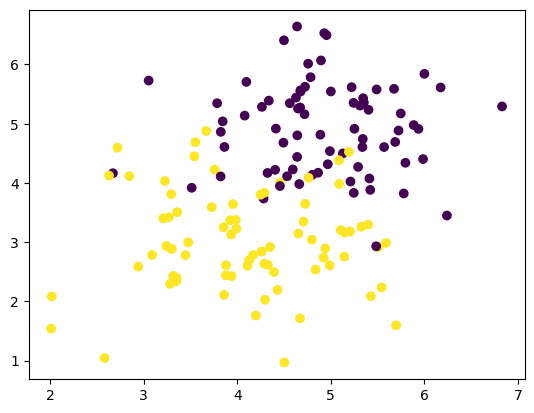

In [2]:
# Generate data

# Configuration options
num_samples_total = 150
cluster_centers = [(5,5), (4,3)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, cluster_std = 0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)


In [3]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear', C=1, degree=1)

# Fit the data to the SVM classifier
svm = svm.fit(X, y)


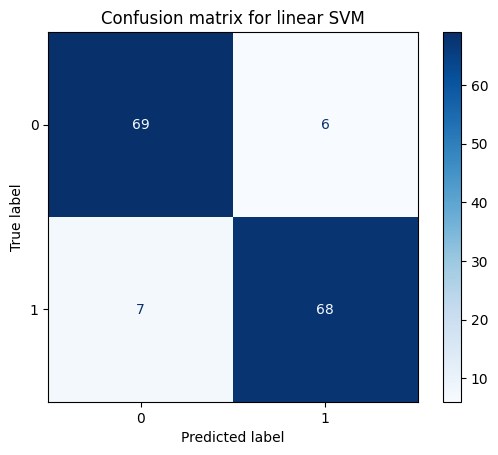

In [4]:
# Evaluate by means of a confusion matrix
matrix = ConfusionMatrixDisplay.from_estimator(svm, X, y,
                                               cmap=plt.cm.Blues)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [5]:
# Generate predictions
y_pred = svm.predict(X)

# Evaluate by means of accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy:.4f}')

Model accuracy: 0.9133


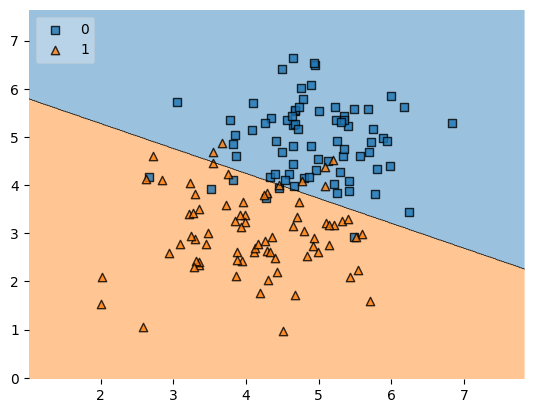

In [6]:
# Plot decision boundary
plot_decision_regions(X, y, clf=svm, legend=2)
plt.show()

# 모델을 평가하려면, 데이터를 어떻게 나누지?

In [10]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  120
no of testing data:  30


In [8]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Model training accuracy: {train_accuracy:.4f}')
print(f'Model testing accuracy: {test_accuracy:.4f}')

Model training accuracy: 0.9000
Model testing accuracy: 0.9333


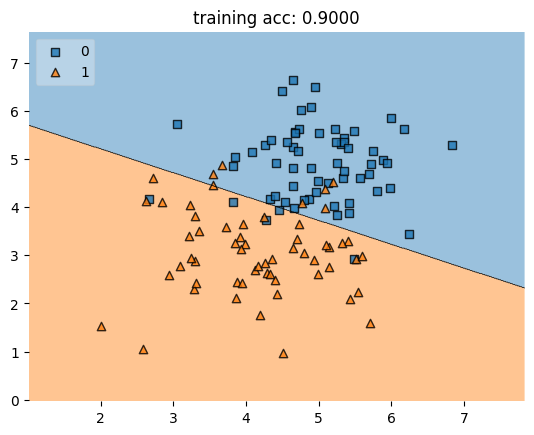

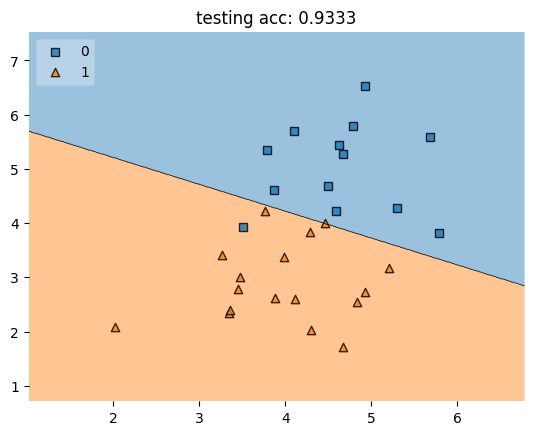

In [11]:
# Plot decision boundary for training data
plot_decision_regions(X_train, y_train, clf=svm, legend=2)
plt.title(f'training acc: {train_accuracy:.4f}')
plt.show()

# Plot decision boundary for testing data
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.title(f'testing acc: {test_accuracy:.4f}')
plt.show()

# 모델이 정말로 견고한지(Robust) 확인해보자!!!
## 교차 검증(Cross Validation).

교차 검증은 데이터를 k-폴드(k-fold)로 나누는 것입니다. 여기서는 5-폴드(5-fold)를 예시로 듭니다. <br>

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV.png" width="512"/>

<br>

**첫 번째 반복(Iteration)**,
* 처음 4개 세트의 데이터를 학습용(파란 상자)으로 사용하고, 마지막 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_1 (validation accuracy_1)*을 얻게 됩니다. <br>

**두 번째 반복**,
* 1, 2, 3, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 4번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_2 (validation accuracy_2)*를 얻게 됩니다. <br>

**세 번째 반복**,
* 1, 2, 4, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 3번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_3 (validation accuracy_3)*을 얻게 됩니다. <br>

**5번째 반복까지 진행하면, 총 5개의 검증 정확도를 얻게 됩니다. <br>
평균 정확도를 계산하여 모델의 성능을 평가할 수 있습니다.**

In [12]:
from sklearn.model_selection import KFold
# refer to https://scikit-learn.org/stable/modules/cross_validation.html

kf = KFold(n_splits=5)
n=1
train_acc, val_acc = [], []

for train_index, test_index in kf.split(X):
  X_train, X_val = X[train_index], X[test_index]
  y_train, y_val = y[train_index], y[test_index]

  print('Fold ', n)
  print('no of training data: ', len(X_train))
  print('no of validation data: ', len(X_val))

  # Create the SVM with linear kernel
  svm = SVC(random_state=42, kernel='linear')

  # Fit the data to the SVM classifier
  svm = svm.fit(X_train, y_train)

  # Generate predictions
  y_pred_train = svm.predict(X_train)
  y_pred_val = svm.predict(X_val)

  # Evaluate by means of accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  val_accuracy = accuracy_score(y_val, y_pred_val)
  print(f'Model training accuracy: {train_accuracy:.4f}')
  print(f'Model testing accuracy: {val_accuracy:.4f}')

  n += 1
  train_acc.append(train_accuracy)
  val_acc.append(val_accuracy)
  print('------------------------------------')

print(f'Validation Accuracy: {np.average(train_acc):.4f} +- {np.std(val_acc):.4f}')

Fold  1
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9000
Model testing accuracy: 0.9333
------------------------------------
Fold  2
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9167
Model testing accuracy: 0.9000
------------------------------------
Fold  3
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9167
Model testing accuracy: 0.8667
------------------------------------
Fold  4
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9167
Model testing accuracy: 0.9000
------------------------------------
Fold  5
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9250
Model testing accuracy: 0.9000
------------------------------------
Validation Accuracy: 0.9150 +- 0.0211


# 하이퍼파라미터 튜닝 (Hyperparameter Tuning)

우리는 튜닝 가능한 파라미터들이 있다는 것을 알고 있습니다. 예를 들어, 커널(선형 / 다항식 / rbf)이나 C(규제항)를 선택하는 것 등입니다. 최적의 하이퍼파라미터를 결정하기 위해, 우리는 교차 검증(Cross Validation) 개념을 사용하여 최적의 값을 찾는 grid_search를 사용합니다.


<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV_test.png" width="512"/>

<br>

**데이터를 학습(Train), 검증(Validation), 테스트(Test) 세트로 분할**

**첫 번째 반복(Iteration)**,
* 처음 4개 세트의 데이터를 학습용(파란 상자)으로 사용하고, 마지막 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키되, ***다양한 하이퍼파라미터 조합을 사용하여*** 학습하고 검증 데이터에 대해 테스트합니다.
* 예를 들어 5가지 하이퍼파라미터 조합을 시도했다면, 5개의 모델과 5개의 검증 정확도를 얻게 됩니다.
* 가장 높은 검증 정확도를 보이는 모델이 선택됩니다.
* *검증 정확도_1 (validation accuracy_1)*과 *하이퍼파라미터 세트_1 (hyperparameter_1)*을 얻게 됩니다. <br>

**두 번째 반복**,
* 1, 2, 3, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 4번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키되, ***다양한 하이퍼파라미터 조합을 사용하여*** 학습하고 검증 데이터에 대해 테스트합니다.
* 예를 들어 5가지 하이퍼파라미터 조합을 시도했다면, 5개의 모델과 5개의 검증 정확도를 얻게 됩니다.
* *검증 정확도_2 (validation accuracy_2)*와 *하이퍼파라미터 세트_2 (hyperparameter_2)*를 얻게 됩니다. <br>


**5번째 반복까지 진행하면, 총 5개의 검증 정확도를 얻게 됩니다. <br>
가장 높은 검증 정확도를 제공하는 하이퍼파라미터 세트가 선택됩니다. <br>
선택된 최적의 하이퍼파라미터를 사용하여 모든 학습 + 검증 데이터를 합친 데이터로 모델을 재학습(Retrain)시킵니다. <br>
테스트 세트에서 최종 모델을 평가합니다**

### 앞서 설명한 절차를 수행하는 GridSearchCV를 사용할 수 있습니다.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/iris.PNG" width="620"/>

이 예제에서는 iris(붓꽃) 데이터를 사용합니다.
X는 4개의 변수를 가집니다.
1. 꽃받침 길이 (sepal length in cm)
2. 꽃받침 너비 (sepal width in cm)
3. 꽃잎 길이 (petal length in cm)
4. 꽃잎 너비 (petal width in cm)

y는 3개의 출력을 가집니다.
* 0 -- Iris Setosa
* 1 -- Iris Versicolour
* 2 -- Iris Virginica

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

# use iris data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))


no of training data:  120
no of testing data:  30


In [14]:
svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)
results = clf.cv_results_
results = pd.DataFrame.from_dict(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001759,0.000999,0.001091,0.000384,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",1.000000,0.933333,0.933333,0.966667,0.958333,0.027639,2
1,0.001355,0.000017,0.000908,0.000019,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.966667,0.766667,0.933333,0.900000,0.891667,0.075920,6
2,0.001086,0.000028,0.000839,0.000058,1.0,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,0.966667,0.933333,0.966667,0.966667,0.023570,1
3,0.001163,0.000039,0.000908,0.000101,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",1.000000,0.933333,0.933333,0.966667,0.958333,0.027639,2
4,0.001081,0.000031,0.000822,0.000033,10.0,linear,"{'C': 10, 'kernel': 'linear'}",0.966667,0.933333,0.933333,1.000000,0.958333,0.027639,5
5,0.001140,0.000123,0.000816,0.000033,10.0,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,0.966667,0.933333,0.966667,0.958333,0.014434,2


In [16]:
# Retrain the model with the best hyperparameter
best_param = clf.best_params_
print('best param: ', best_param)
svc.set_params(**best_param)
svc.fit(X_train, y_train)

best param:  {'C': 1, 'kernel': 'linear'}


SVC(C=1, kernel='linear')

In [17]:
# Evaluate model performance using test data

# Generate predictions
y_pred = svc.predict(X_test)

# Evaluate by means of accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('Model CV accuracy: ', results['mean_test_score'].iloc[2])
print('Model testing accuracy: ', test_accuracy)
print('Parameter used:', best_param)

Model CV accuracy:  0.9666666666666668
Model testing accuracy:  1.0
Parameter used: {'C': 1, 'kernel': 'linear'}


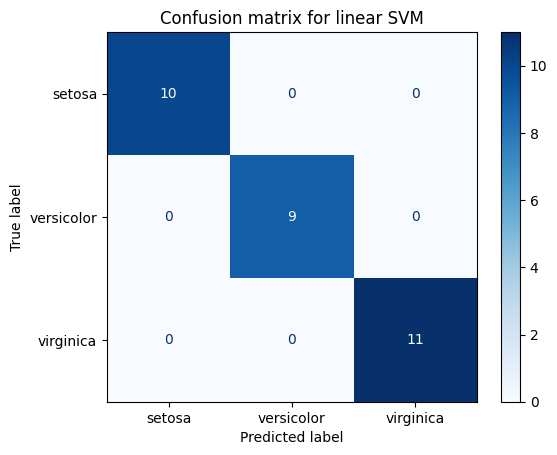

In [18]:
# Evaluate by means of a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate by means of a confusion matrix
matrix = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test,
                              cmap=plt.cm.Blues,
                               display_labels=iris.target_names)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [19]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 최종과제: 유방암 데이터를 가장 잘 분류하는 SVM 모델 학습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target


In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from mlxtend.plotting import plot_decision_regions

In [4]:

# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear', C=1, degree=1)

# Fit the data to the SVM classifier
svm = svm.fit(X, y)

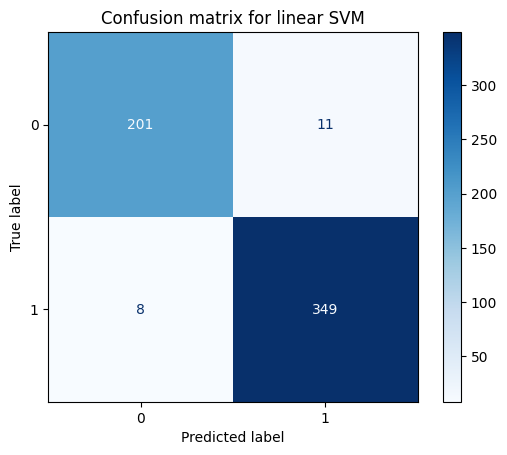

In [5]:
# Evaluate by means of a confusion matrix
matrix = ConfusionMatrixDisplay.from_estimator(svm, X, y,
                                               cmap=plt.cm.Blues)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [6]:
# Generate predictions
y_pred = svm.predict(X)

# Evaluate by means of accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy:.4f}')

Model accuracy: 0.9666


# 데이터를 어떻게 나누는가




In [7]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  455
no of testing data:  114


In [8]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Model training accuracy: {train_accuracy:.4f}')
print(f'Model testing accuracy: {test_accuracy:.4f}')

Model training accuracy: 0.9692
Model testing accuracy: 0.9561


# 하이퍼파라미터 튜닝

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn import datasets
import matplotlib.pyplot as plt

# Load data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

#  Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Hyperparameter Search
param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [1, 5, 10]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
results = grid.cv_results_
results = pd.DataFrame.from_dict(results)
results

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.118034,0.049907,0.006658,0.003284,0.01,1,0.001,linear,"{'C': 0.01, 'degree': 1, 'gamma': 0.001, 'kern...",0.956044,0.934066,0.978022,0.956044,0.912088,0.947253,0.022413,13
1,0.052144,0.013280,0.021740,0.005127,0.01,1,0.001,rbf,"{'C': 0.01, 'degree': 1, 'gamma': 0.001, 'kern...",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,40
2,0.076157,0.027674,0.006167,0.001975,0.01,1,0.010,linear,"{'C': 0.01, 'degree': 1, 'gamma': 0.01, 'kerne...",0.956044,0.934066,0.978022,0.956044,0.912088,0.947253,0.022413,13
3,0.049904,0.007901,0.019798,0.003360,0.01,1,0.010,rbf,"{'C': 0.01, 'degree': 1, 'gamma': 0.01, 'kerne...",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,40
4,0.062080,0.022158,0.004323,0.001033,0.01,1,0.100,linear,"{'C': 0.01, 'degree': 1, 'gamma': 0.1, 'kernel...",0.956044,0.934066,0.978022,0.956044,0.912088,0.947253,0.022413,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.018627,0.000369,0.006776,0.000106,1.00,10,0.010,rbf,"{'C': 1, 'degree': 10, 'gamma': 0.01, 'kernel'...",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,40
68,2.940681,2.862384,0.001676,0.000088,1.00,10,0.100,linear,"{'C': 1, 'degree': 10, 'gamma': 0.1, 'kernel':...",0.956044,0.978022,0.978022,0.956044,0.912088,0.956044,0.024076,1
69,0.018915,0.000535,0.006743,0.000058,1.00,10,0.100,rbf,"{'C': 1, 'degree': 10, 'gamma': 0.1, 'kernel':...",0.637363,0.626374,0.626374,0.626374,0.626374,0.628571,0.004396,40
70,2.661152,2.356385,0.002832,0.001802,1.00,10,1.000,linear,"{'C': 1, 'degree': 10, 'gamma': 1, 'kernel': '...",0.956044,0.978022,0.978022,0.956044,0.912088,0.956044,0.024076,1


Best hyperparameters: {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best validation accuracy: 0.956043956043956
Final test accuracy: 0.956140350877193


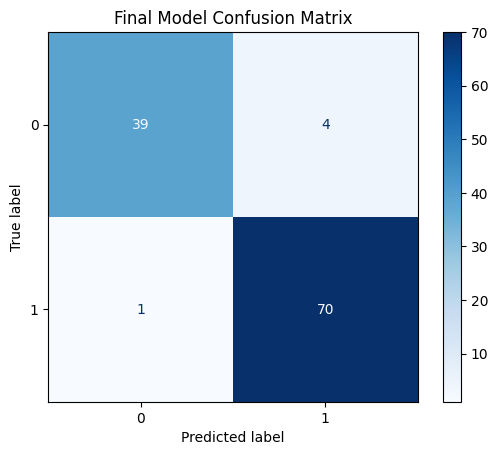

In [21]:
print("Best hyperparameters:", grid.best_params_)
print("Best validation accuracy:", grid.best_score_)

# Retrain on train set
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final test accuracy:", accuracy)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Final Model Confusion Matrix")
plt.show()